In [13]:
# Data processing
# for machine learning model
# correlation

import pandas as pd

df  = pd.read_csv('crop.csv')

c = df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target'] = c.cat.codes


y = df.target
x = df[['N','P','K','temperature','humidity','ph','rainfall']]

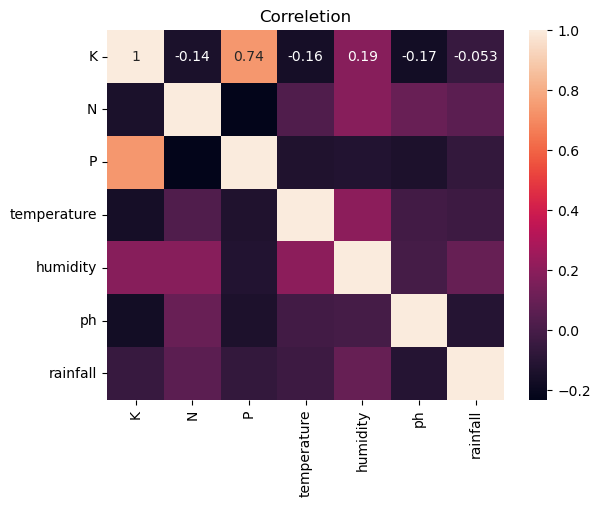

In [14]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

c = df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target'] = c.cat.codes

y = df.target
x = df[['K','N','P','temperature', 'humidity','ph', 'rainfall']]

sns.heatmap(x.corr(), annot=True)
plt.title("Correletion")
plt.show()

# sns.heatmap(x.corr(),annot=True)
# plt.show()

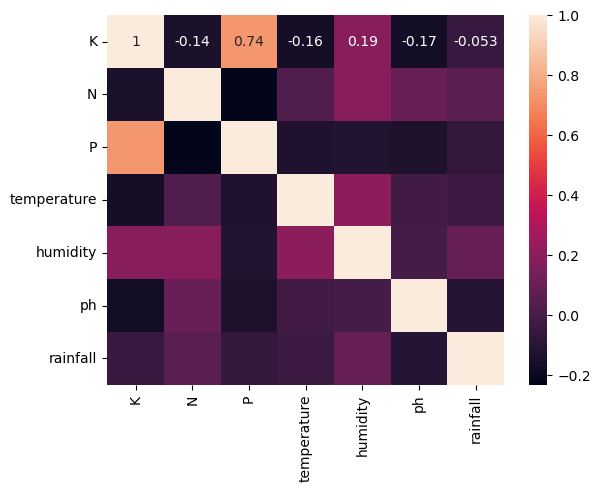

In [15]:
sns.heatmap(x.corr(),annot=True)
plt.show()

In [16]:
# Macine learning models, set,train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [17]:
# Selection of model: KNN, Confusion Matrix, Random forst, Use classification like SVM, decision tree
# Predict using knn

from sklearn.neighbors import KNeighborsClassifier 


knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
score = knn.score(X_test_scaled, y_test)
print(score)

0.975


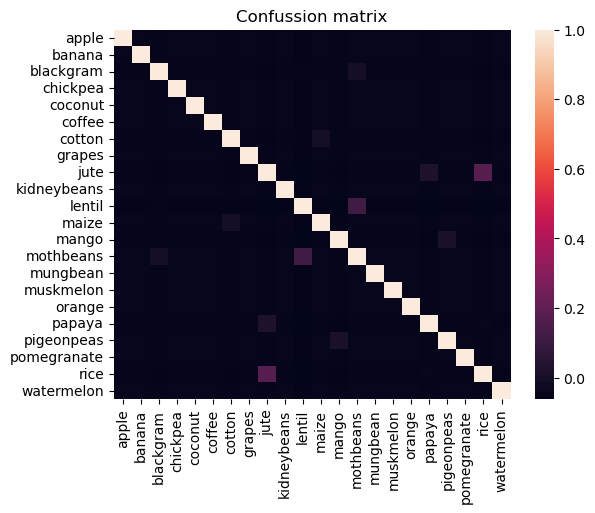

In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, knn.predict(X_test_scaled))

df_cm = pd.DataFrame(mat,index=(i for i in targets.values()), columns=(targets.values()))
sns.heatmap(df_cm.corr())
plt.title("Confussion matrix")
plt.show()


In [19]:
# Classification using Support Vector Classifier

from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train_scaled, y_train)
score = svc_linear.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='rbf')
svc_poly.fit(x_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

0.9704545454545455
0.9886363636363636
0.9840909090909091


In [20]:
#  Highlights
# Poly kernel has a small margin accuracy score than the RBF 

In [21]:
# Classifier using decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

0.9954545454545455

In [22]:
# Classifier using decision random forest 

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

0.9977272727272727

In [23]:
# Machine learning
# Split data into three categories
# Numerical , Categorical and Ordinal


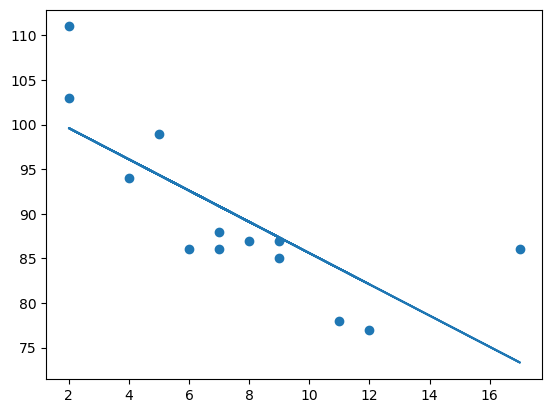

In [24]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

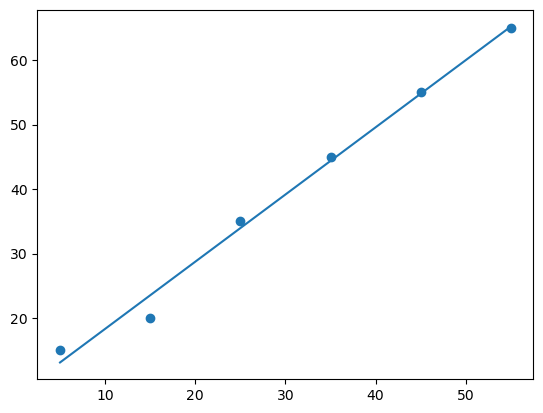

In [25]:
# Linear regression 

x=[5,15,25,35,45,55]
y = [15,20,35,45,55,65]

import matplotlib.pyplot as pl
from scipy import stats
slope, intercept,r,p, std_err = stats.linregress(x,y)

def myfunc(x):
    return slope*x+intercept

mymodel = list(map(myfunc,x))

pl.scatter(x,y)
pl.plot(x,mymodel)
pl.show()

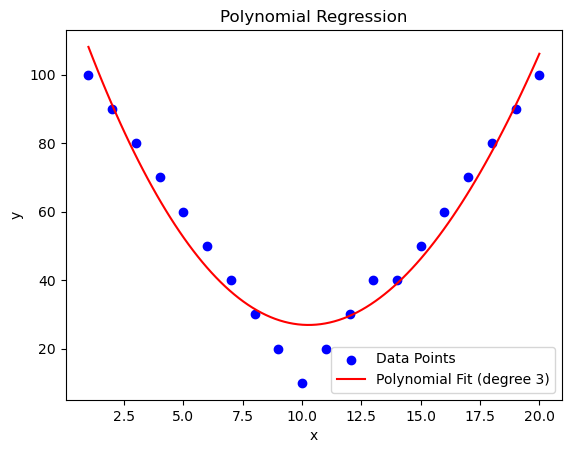

In [26]:
# polynomial regression


import numpy as np
import matplotlib.pyplot as plt

# Given data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10,20,30,40, 40, 50, 60, 70, 80, 90, 100]

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Fit a polynomial of degree 3
degree = 3
coefficients = np.polyfit(x, y, degree)

# Create a polynomial function with the coefficients
polynomial = np.poly1d(coefficients)

# Generate y values based on the polynomial function
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the polynomial fit
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial Fit (degree {degree})')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()

# Show the plot
plt.show()
